# BW #29: Autounfälle 

Es scheinen mehr Autos unterwegs zu sein als je zuvor. Aber gibt es auch mehr Autounfälle? Diese Woche untersuchen wir Daten über Unfälle in OECD-Ländern. 

In [1]:
# Quelle
# https://www.bambooweekly.com/p/bw-29-auto-accidents

Diese Woche habe ich Sie gebeten, sich zwei verschiedene Datenquellen anzusehen. Der wichtigste ist der OECD-Bericht über Verkehrsunfälle, eine CSV-Datei, die Sie herunterladen können von:

https://stats.oecd.org/sdmx-json/data/DP_LIVE/.ROADACCID.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en

Außerdem nutzen wir auch die Wikipedia-Seite, die dreibuchstabige ISO-Ländercodes in Ländernamen übersetzt:

https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

Hier sind meine neun Fragen und Aufgaben für diese Woche. Zu den Lernzielen gehören das Auswählen von Zeilen und Spalten mit .loc, das Berechnen prozentualer Unterschiede, das Plotten mit ausgewählten Teilen der Daten, das Erstellen von Datenrahmen aus HTML-Seiten und das Zusammenfügen von:

    Laden Sie die Daten von OECD in einen Datenrahmen. Wir werden uns die Spalten mit den Namen „INDICATOR“, „FREQUENCY“ oder „Flag Codes“ nicht ansehen.

    Für welches Jahr liegen uns aktuell Daten vor? Gibt es Länder, für die die neuesten Daten nicht aus diesem Jahr stammen? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DP_LIVE_27092023205500242.csv', sep=',')

In [4]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,SVN,ROADACCID,DEATH,NBR,A,1970,620.0,NaN
1,SVN,ROADACCID,DEATH,NBR,A,1971,644.0,NaN
2,SVN,ROADACCID,DEATH,NBR,A,1972,625.0,NaN
3,SVN,ROADACCID,DEATH,NBR,A,1973,701.0,NaN
4,SVN,ROADACCID,DEATH,NBR,A,1974,557.0,NaN


In [5]:
# Es werden nicht alle Spalten benötigt
# df.drop("INDICATOR", "FREQUENCY", "Flag Codes")
df.drop(["INDICATOR", "FREQUENCY", "Flag Codes"], axis=1, inplace=True)

In [6]:
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,SVN,DEATH,NBR,1970,620.0
1,SVN,DEATH,NBR,1971,644.0
2,SVN,DEATH,NBR,1972,625.0
3,SVN,DEATH,NBR,1973,701.0
4,SVN,DEATH,NBR,1974,557.0


In [7]:
# Bis zu welchem Jahr liegen Daten vor?
df['TIME'].max()

2021

In [8]:
# -> Wie kann ich die Datentypen von df ermitteln?
df.dtypes

LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object

In [9]:
# -> Wie kann ich bestimmen, welche 'LOCATION' keine Daten TIME von 2021 hat? Time ist ein Integer. Die Ausgabe soll 'LOCATION' und 'TIME' enthalten
# -> Keine brauchbare Lösung mit CodeGPT!!
df.groupby('LOCATION')['TIME'].max().loc[
    df.groupby('LOCATION')['TIME'].max() < df['TIME'].max()
]

LOCATION
ARG    2017
ARM    2017
BIH    2020
BLR    2020
CHN    2019
IND    2017
KAZ    2020
KHM    2016
MAR    2018
MEX    2020
MNE    2017
ROU    2019
RUS    2020
UKR    2017
UZB    2020
Name: TIME, dtype: int64

In [10]:
# Tabelle mit den Ländercodes einlesen
country_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes')[0]
country_df.head()


ISO 3166[1]                           Unnamed: 1_level_0  \
  Country name[5]                    Official state name[6][a]   
0     Afghanistan          The Islamic Republic of Afghanistan   
1   Åland Islands                                        Åland   
2         Albania                      The Republic of Albania   
3         Algeria  The People's Democratic Republic of Algeria   
4  American Samoa              The Territory of American Samoa   

    Unnamed: 2_level_0   ISO 3166-1[2]                                  \
  Sovereignty[6][7][8] Alpha-2 code[5] Alpha-3 code[5] Numeric code[5]   
0      UN member state              AF             AFG             004   
1              Finland              AX             ALA             248   
2      UN member state              AL             ALB             008   
3      UN member state              DZ             DZA             012   
4        United States              AS             ASM             016   

              ISO 3166-2[3] Unnamed: 7_level_0  
  Subdivision code links[3]  Internet ccTLD[9]  
0             ISO 3166-2:AF                .af  
1             ISO 3166-2:AX                .ax  
2             ISO 3166-2:AL                .al  
3             ISO 3166-2:DZ                .dz  
4             ISO 3166-2:AS                .as

In [11]:
# -> Ich möchte von einem df Spalte 0 und 4
country_df = country_df[[country_df.columns[0], country_df.columns[4]]]
country_df.head()

,ISO 3166[1],ISO 3166-1[2]
,Country name[5],Alpha-3 code[5]
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [12]:
# Ersetze die Spaltennamen
# Entferne die zweite Zeile im Spaltennamen
# country_df.columns = country_df.columns.str.replace('[.*]', '', regex=True)

# Ausgabe des aktualisierten DataFrames
# print(df)


In [13]:
# Es scheint, dass der Fehler auftritt, weil dein DataFrame df einen MultiIndex für die Spalten hat. Die str.replace-Methode kann jedoch nur auf einzelne Spalten angewendet werden, nicht auf einen MultiIndex.
# Um die zweite Zeile im Spaltennamen eines MultiIndex zu entfernen, kannst du den MultiIndex in einen einfachen Index umwandeln und dann die str.replace-Methode anwenden.

# Wandle den MultiIndex in einen einfachen Index um
country_df.columns = country_df.columns.get_level_values(0)

# Entferne die zweite Zeile im Spaltennamen
country_df.columns = country_df.columns.str.replace('[.*]', '', regex=True)

# Ausgabe des aktualisierten DataFrames
print(country_df)

             ISO 3166[1] ISO 3166-1[2]
0            Afghanistan           AFG
1          Åland Islands           ALA
2                Albania           ALB
3                Algeria           DZA
4         American Samoa           ASM
..                   ...           ...
266    Wallis and Futuna           WLF
267  Western Sahara [aj]           ESH
268                Yemen           YEM
269               Zambia           ZMB
270             Zimbabwe           ZWE

[271 rows x 2 columns]


In [14]:
type(country_df)

pandas.core.frame.DataFrame

In [15]:
# Erstelle ein Mapping zwischen den ISO-Codes und den Ländernamen
# mapping = dict(zip(country_df['ISO 3166[1]'], country_df['ISO 3166-1[2]']))
# -> Die 
mapping = dict(zip(country_df['ISO 3166-1[2]'], country_df['ISO 3166[1]']))

# Ersetze die Spalte "LOCATION" durch "Country name"
df.rename(columns={'LOCATION': 'Country name'}, inplace=True)

# Aktualisiere die Werte in der Spalte "Country name" basierend auf dem Mapping
df['Country name'] = df['Country name'].map(mapping)

# Ausgabe des aktualisierten DataFrames
print(df.head())

  Country name SUBJECT MEASURE  TIME  Value
0     Slovenia   DEATH     NBR  1970  620.0
1     Slovenia   DEATH     NBR  1971  644.0
2     Slovenia   DEATH     NBR  1972  625.0
3     Slovenia   DEATH     NBR  1973  701.0
4     Slovenia   DEATH     NBR  1974  557.0


# Welche fünf Länder haben im Zeitraum 2017–2022 im Durchschnitt die höchste Zahl an Verkehrstoten, gemessen pro 1 Mio. Fahrzeuge ? 

In [16]:
# df['MEASURE'] == '1000000VEH'

In [17]:
# df['TIME'].isin(range(2017,2023))

In [18]:
# df['SUBJECT'] == 'DEATH'

In [19]:
# ((df['MEASURE'] == '1000000VEH') &
#     (df['TIME'].isin(range(2017,2023))) &
#     (df['SUBJECT'] == 'DEATH'))

In [20]:
# -> Wie kann ich in dieser Abfrage nur diejenigen Zeilen zurückerhalten, welche 'True' sind?
# ((df['MEASURE'] == '1000000VEH') &
# (df['TIME'].isin(range(2017,2023))) &
# 
# (df['SUBJECT'] == 'DEATH'))

In [21]:

# Definiere die Bedingungen
conditions = ((df['MEASURE'] == '1000000VEH') &
              (df['TIME'].isin(range(2017, 2023))) &
              (df['SUBJECT'] == 'DEATH'))

# Wähle nur die Zeilen aus, in denen die Bedingungen True sind
filtered_df = df.loc[conditions]

# Ausgabe des gefilterten DataFrames
print(filtered_df)


       Country name SUBJECT     MEASURE  TIME      Value
8440  Australia [c]   DEATH  1000000VEH  2017   0.654222
8441  Australia [c]   DEATH  1000000VEH  2018   0.594262
8442  Australia [c]   DEATH  1000000VEH  2019   0.611002
8443  Australia [c]   DEATH  1000000VEH  2020   0.559664
8444  Australia [c]   DEATH  1000000VEH  2021   0.553335
...             ...     ...         ...   ...        ...
9209        Morocco   DEATH  1000000VEH  2017  10.007652
9210        Morocco   DEATH  1000000VEH  2018   8.654839
9212     Montenegro   DEATH  1000000VEH  2017   2.925606
9361  Liechtenstein   DEATH  1000000VEH  2017   0.519009
9362  Liechtenstein   DEATH  1000000VEH  2018   0.000000

[131 rows x 5 columns]


In [29]:
# -> Wir wollen die durchschnittliche Zahl der Verkehrstoten in diesen Jahren pro Land berechnen.

In [22]:
# Gruppiere das DataFrame nach dem Land und berechne den Durchschnitt der Werte
average_deaths_per_country = filtered_df.groupby('Country name')['Value'].mean()

# Ausgabe des Durchschnitts der Verkehrstoten pro Land
print(average_deaths_per_country)


Country name
Australia [c]                  0.594497
Austria                        0.625382
Belgium                        0.808885
Bosnia and Herzegovina         2.678434
Chile                          3.550065
Croatia                        1.437073
Czechia [j]                    0.748582
Denmark                        0.510348
Estonia                        0.581684
Finland                        0.467753
France [m]                     0.641345
Germany                        0.531400
Hungary                        1.260116
Ireland                        0.566020
Italy                          0.568544
Latvia                         1.612242
Liechtenstein                  0.259504
Lithuania                      1.041844
Luxembourg                     1.016893
Malta                          0.427337
Montenegro                     2.925606
Morocco                        9.331246
Netherlands, Kingdom of the    0.566163
North Macedonia [t]            2.745658
Norway                     

In [23]:
# -> Wir wollen nur die fünf Länder mit den schlimmsten Verstößen
# Achtung: Unklare Formulierung!!!

In [24]:
# Gruppiere das DataFrame nach dem Land und berechne die Summe der Verkehrstoten
total_deaths_per_country = filtered_df.groupby('Country name')['Value'].sum()

# Wähle die fünf Länder mit den höchsten Verkehrstoten aus
top_countries = total_deaths_per_country.nlargest(5)

# Ausgabe der Länder mit den höchsten Verkehrstoten
print(top_countries)

Country name
Morocco                   18.662491
Chile                     17.750325
North Macedonia [t]        8.236975
Latvia                     8.061209
Bosnia and Herzegovina     8.035301
Name: Value, dtype: float64


In [25]:
# -> Ich brauche den Mittelwert
# Präzisierung bringt das korrekte Ergebnis!

In [26]:
df.loc[
    ((df['MEASURE'] == '1000000VEH') &
    (df['TIME'].isin(range(2017,2023))) &
    (df['SUBJECT'] == 'DEATH'))
].groupby('Country name')['Value'].mean().sort_values(ascending=False).head(5)

Country name
Morocco                   9.331246
Chile                     3.550065
Montenegro                2.925606
North Macedonia [t]       2.745658
Bosnia and Herzegovina    2.678434
Name: Value, dtype: float64

In [27]:
# Wie schneidet die Schweiz ab?

In [28]:
# Zugriff auf den Durchschnittswert für die Schweiz
switzerland_average = average_deaths_per_country.loc['Switzerland']

# Ausgabe des Durchschnittswerts für die Schweiz
print(switzerland_average)

0.35214943424645


In [29]:
# Welche 5 Länder sind am besten?

In [30]:
# Wähle die fünf Länder mit den niedrigsten Durchschnittswerten aus
top_countries = average_deaths_per_country.nsmallest(5)

# Ausgabe der Länder mit den niedrigsten Durchschnittswerten
print(top_countries)


Country name
Liechtenstein    0.259504
Norway           0.280166
Switzerland      0.352149
Sweden           0.404701
Malta            0.427337
Name: Value, dtype: float64


# In welchen fünf Ländern gab es im Zeitraum 2017–2022 durchschnittlich die meisten Verkehrstoten, gemessen pro 1 Mio. Einwohner ? 

In [31]:
# Hier können die Strukturtemplates von oben verwendet werden!
df.loc[
    ((df['MEASURE'] == '1000000HAB') &
    (df['TIME'].isin(range(2017,2023))) &
    (df['SUBJECT'] == 'DEATH'))
].groupby('Country name')['Value'].mean().sort_values(ascending=False).head(5)

Country name
Georgia                           12.661899
Argentina                         12.305649
Russian Federation (the) [w]      12.196730
United States of America (the)    11.660817
Kazakhstan                        11.049232
Name: Value, dtype: float64

# --- und wo am wenigsten?

In [32]:
# Anpassung des Strukturtemplates von oben
df.loc[
    ((df['MEASURE'] == '1000000HAB') &
    (df['TIME'].isin(range(2017,2023))) &
    (df['SUBJECT'] == 'DEATH'))
].groupby('Country name')['Value'].mean().sort_values(ascending=True).head(5)

Country name
Liechtenstein    1.571765
Norway           1.853875
Mexico           2.346509
Sweden           2.365263
Switzerland      2.512875
Name: Value, dtype: float64

# In welchen fünf Ländern haben die Verletzungen im Laufe der Jahre prozentual am stärksten zugenommen? In welchen fünf Ländern ist der Prozentsatz am stärksten gesunken? 

In [33]:
# -> In welchen fünf Ländern haben die Verletzungen im Laufe der Jahre prozentual am stärksten zugenommen?
# df.loc[
# df['SUBJECT'] == 'INJURE'
# ]

In [34]:
# Filtere das DataFrame basierend auf dem 'SUBJECT' "INJURE"
filtered_df = df.loc[df['SUBJECT'] == 'INJURE']

# Gruppiere das DataFrame nach dem Land und berechne den prozentualen Anstieg der Verletzungen über die Jahre
percentage_increase = filtered_df.groupby('Country name')['Value'].pct_change()

# Füge den prozentualen Anstieg als neue Spalte zum DataFrame hinzu
filtered_df['Percentage Increase'] = percentage_increase

# Gruppiere das DataFrame erneut nach dem Land und berechne den durchschnittlichen prozentualen Anstieg
average_percentage_increase = filtered_df.groupby('Country name')['Percentage Increase'].mean() * 100

# Wähle die fünf Länder mit dem höchsten durchschnittlichen prozentualen Anstieg aus
top_countries = average_percentage_increase.nlargest(5)

# Ausgabe der Länder mit dem höchsten prozentualen Anstieg
print(top_countries)

Country name
Bosnia and Herzegovina    13.330688
Romania                   13.259257
Albania                    9.469802
Armenia                    7.232386
Türkiye [ac]               6.170635
Name: Percentage Increase, dtype: float64


C:\Users\Walter\AppData\Local\Temp\ipykernel_12888\3311681616.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Percentage Increase'] = percentage_increase


In [35]:
# -> Gegenteil von nlargest?

In [36]:
# Wähle die fünf Länder mit dem kleinsten durchschnittlichen prozentualen Anstieg aus
bottom_countries = average_percentage_increase.nsmallest(5)

# Ausgabe der Länder mit dem kleinsten prozentualen Anstieg
print(bottom_countries)

Country name
Netherlands, Kingdom of the   -4.351504
Denmark                       -4.028832
China                         -3.642433
France [m]                    -2.885770
Belarus                       -2.781796
Name: Percentage Increase, dtype: float64


In [37]:
average_percentage_increase.loc['Switzerland']

-1.0218224602743855

# Finden Sie das Jahr, in dem jedes Land den größten Anstieg der Verkehrstoten pro 1 Mio. Einwohner verzeichnete. Was ist mit dem Jahr, in dem jedes Land den stärksten Rückgang verzeichnete? Hängen diese Zahlen zusammen? 

In [38]:
# Filtere das DataFrame basierend auf dem 'SUBJECT' "DEATHRATE"
# Keine Lösung mit CodeGPT
filtered_df = df.loc[
    ((df['MEASURE'] == '1000000HAB') &
    (df['SUBJECT'] == 'DEATH'))
].pivot_table(index='TIME', columns='Country name', values='Value').pct_change().idxmax().value_counts().head()

C:\Users\Walter\AppData\Local\Temp\ipykernel_12888\3216661520.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  filtered_df = df.loc[


In [39]:
filtered_df

2021    12
2007     7
1998     4
2018     3
2013     3
Name: count, dtype: int64

# Erstellen Sie ein Liniendiagramm, das die Anzahl der autobedingten Todesfälle pro Jahr, gemessen pro 1 Million Einwohner, für die folgenden Länder zeigt: USA, Frankreich, Deutschland, Kanada, Großbritannien, Australien, Italien, Portugal und Israel. Haben sie alle in den letzten ein bis zwei Jahrzehnten die Zahl der Verkehrstoten verringert? Gibt es Länder, denen es besonders schlechter geht als den anderen?


<Axes: xlabel='TIME'>

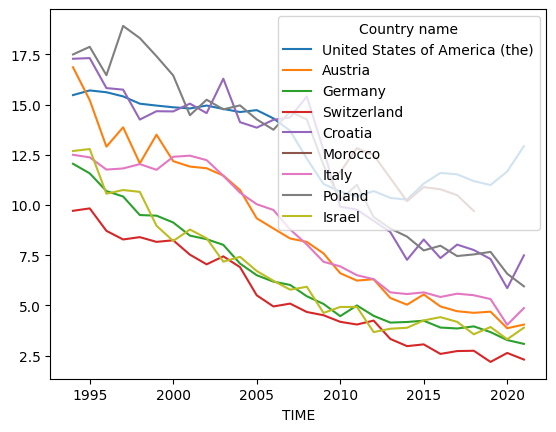

In [40]:
# Durch CodeGPT erzeugt
df.loc[
    ((df['MEASURE'] == '1000000HAB') &
    (df['SUBJECT'] == 'DEATH'))
].pivot_table(index='TIME', columns='Country name', values='Value')[['United States of America (the)', 'Austria', 'Germany', 'Switzerland', 'Croatia',                                                                 'Morocco', 'Italy', 'Poland', 'Israel'
]].plot.line()

<Axes: xlabel='TIME'>

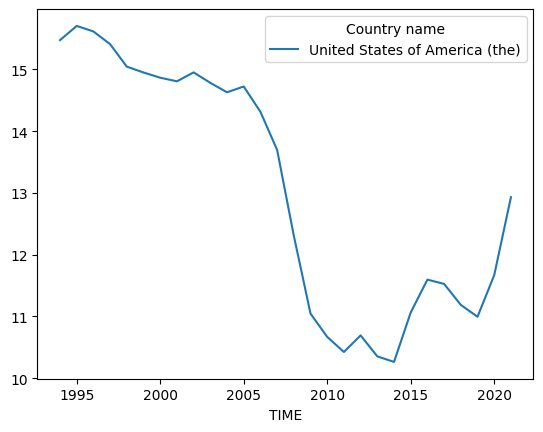

In [41]:
# Aus Template oben abgeleitet
df.loc[
    ((df['MEASURE'] == '1000000HAB') &
    (df['SUBJECT'] == 'DEATH'))
].pivot_table(index='TIME', columns='Country name', values='Value')[['United States of America (the)'
]].plot.line()

<Axes: xlabel='TIME'>

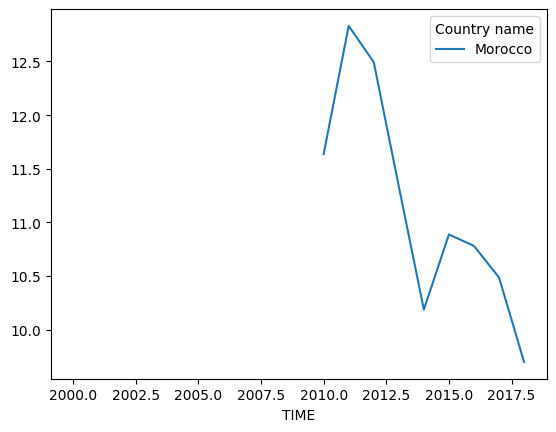

In [45]:
# Nur Daten bis 2017!!
df.loc[
    ((df['MEASURE'] == '1000000HAB') &
    (df['SUBJECT'] == 'DEATH'))
].pivot_table(index='TIME', columns='Country name', values='Value')[['Morocco'
]].plot.line()

<Axes: xlabel='TIME'>

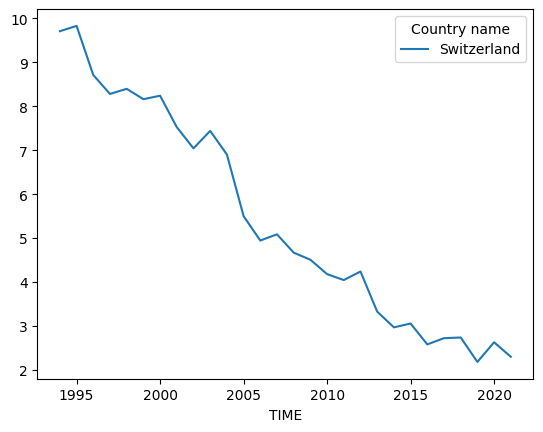

In [45]:
df.loc[
    ((df['MEASURE'] == '1000000HAB') &
    (df['SUBJECT'] == 'DEATH'))
].pivot_table(index='TIME', columns='Country name', values='Value')[['Switzerland'
]].plot.line()